In [ ]:
import pandas as pd
import nflfastpy as nfl
import seaborn as sns
import matplotlib.pyplot as plt

import requests
from io import BytesIO

In [2]:
df = nfl.load_pbp_data(2021)

df.head()

,play_id,game_id,old_game_id,home_team,away_team,season_type,week,posteam,posteam_type,defteam,...,out_of_bounds,home_opening_kickoff,qb_epa,xyac_epa,xyac_mean_yardage,xyac_median_yardage,xyac_success,xyac_fd,xpass,pass_oe
0,1,2021_01_ARI_TEN,2021091207,TEN,ARI,REG,1,NaN,NaN,NaN,...,0,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,40,2021_01_ARI_TEN,2021091207,TEN,ARI,REG,1,TEN,home,ARI,...,0,1,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,55,2021_01_ARI_TEN,2021091207,TEN,ARI,REG,1,TEN,home,ARI,...,0,1,-1.399805,NaN,NaN,NaN,NaN,NaN,0.491433,-49.143299
3,76,2021_01_ARI_TEN,2021091207,TEN,ARI,REG,1,TEN,home,ARI,...,0,1,0.032412,1.165133,5.803177,4.0,0.896654,0.125098,0.697346,30.265415
4,100,2021_01_ARI_TEN,2021091207,TEN,ARI,REG,1,TEN,home,ARI,...,0,1,-1.532898,0.256036,4.147637,2.0,0.965009,0.965009,0.978253,2.174652


In [3]:
df.groupby('posteam')[['epa']].mean().sort_values(by = 'epa', ascending = False)

,epa
posteam,
KC,0.120176
BUF,0.083549
GB,0.072740
TB,0.063569
NE,0.043025
LAC,0.042011
DAL,0.041554
IND,0.039431
LA,0.033368


In [4]:
qbs = df.groupby(['passer_player_id', 'passer_player_name'], 
                as_index=False).agg({'play_id': 'count', 'epa': 'mean', 'cpoe': 'mean'})

qbs = qbs.loc[qbs.play_id > 199]

qbs.sort_values('epa', ascending=False, inplace=True)

qbs = qbs.round(2)

qbs.columns = ['ID', 'Player', 'Dropbacks', 'EPA', 'CPOE']

qbs

,ID,Player,Dropbacks,EPA,CPOE
3,00-0023459,A.Rodgers,321,0.26,5.82
12,00-0026498,M.Stafford,781,0.21,1.15
70,00-0033873,P.Mahomes,819,0.20,3.25
0,00-0019596,T.Brady,840,0.16,1.24
115,00-0036355,J.Herbert,710,0.15,-0.55
4,00-0023459,Aa.Rodgers,275,0.15,5.58
86,00-0034857,J.Allen,696,0.14,2.16
40,00-0031345,J.Garoppolo,550,0.14,0.63
58,00-0033077,D.Prescott,679,0.14,1.56
117,00-0036442,J.Burrow,735,0.12,5.93


In [5]:
df_passes = df.loc[(df['pass_attempt']==1) & (df['air_yards'].notnull()) & (df['down'].isin([3,4]))]

df_passes = df_passes[['passer_player_id', 'passer_player_name', 'posteam', 'down', 'ydstogo', 'air_yards']]

df_passes['yards_past_sticks'] = df_passes['air_yards'] - df_passes['ydstogo']

df_passes.head(10)

,passer_player_id,passer_player_name,posteam,down,ydstogo,air_yards,yards_past_sticks
4,00-0029701,R.Tannehill,TEN,3.0,10,10.0,0.0
15,00-0035228,K.Murray,ARI,3.0,16,16.0,0.0
25,00-0035228,K.Murray,ARI,3.0,5,5.0,0.0
30,00-0029701,R.Tannehill,TEN,3.0,16,-1.0,-17.0
34,00-0035228,K.Murray,ARI,3.0,3,3.0,0.0
38,00-0029701,R.Tannehill,TEN,3.0,12,3.0,-9.0
39,00-0032496,M.Farley,TEN,4.0,4,4.0,0.0
64,00-0029701,R.Tannehill,TEN,3.0,10,7.0,-3.0
72,00-0035228,K.Murray,ARI,3.0,10,17.0,7.0
77,00-0035228,K.Murray,ARI,3.0,6,20.0,14.0


In [6]:
top_10 = df_passes.groupby(['passer_player_id', 'passer_player_name', 'posteam'], 
            as_index=False)['yards_past_sticks'].sum().sort_values(by='yards_past_sticks', ascending=False)[:10]

df_passes = df_passes.loc[df['passer_player_id'].isin(top_10['passer_player_id'])]

df_passes.head(10)

,passer_player_id,passer_player_name,posteam,down,ydstogo,air_yards,yards_past_sticks
15,00-0035228,K.Murray,ARI,3.0,16,16.0,0.0
25,00-0035228,K.Murray,ARI,3.0,5,5.0,0.0
34,00-0035228,K.Murray,ARI,3.0,3,3.0,0.0
72,00-0035228,K.Murray,ARI,3.0,10,17.0,7.0
77,00-0035228,K.Murray,ARI,3.0,6,20.0,14.0
104,00-0035228,K.Murray,ARI,3.0,3,21.0,18.0
115,00-0035228,K.Murray,ARI,3.0,3,26.0,23.0
136,00-0035228,K.Murray,ARI,3.0,4,11.0,7.0
189,00-0031280,D.Carr,LV,3.0,9,7.0,-2.0
207,00-0031280,D.Carr,LV,3.0,10,20.0,10.0


In [7]:
team_logos_colors = nfl.load_team_logo_data()

df_passes = df_passes.merge(team_logos_colors[['team_abbr', 'team_color', 'team_color2']].
            rename(columns = {'team_abbr': 'posteam'}), on='posteam')

df_passes

,passer_player_id,passer_player_name,posteam,down,ydstogo,air_yards,yards_past_sticks,team_color,team_color2
0,00-0035228,K.Murray,ARI,3.0,16,16.0,0.0,#97233F,#000000
1,00-0035228,K.Murray,ARI,3.0,5,5.0,0.0,#97233F,#000000
2,00-0035228,K.Murray,ARI,3.0,3,3.0,0.0,#97233F,#000000
3,00-0035228,K.Murray,ARI,3.0,10,17.0,7.0,#97233F,#000000
4,00-0035228,K.Murray,ARI,3.0,6,20.0,14.0,#97233F,#000000
...,...,...,...,...,...,...,...,...,...
1662,00-0029263,R.Wilson,SEA,3.0,16,8.0,-8.0,#002244,#69be28
1663,00-0029263,R.Wilson,SEA,3.0,6,19.0,13.0,#002244,#69be28
1664,00-0029263,R.Wilson,SEA,3.0,7,6.0,-1.0,#002244,#69be28
1665,00-0029263,R.Wilson,SEA,3.0,5,8.0,3.0,#002244,#69be28


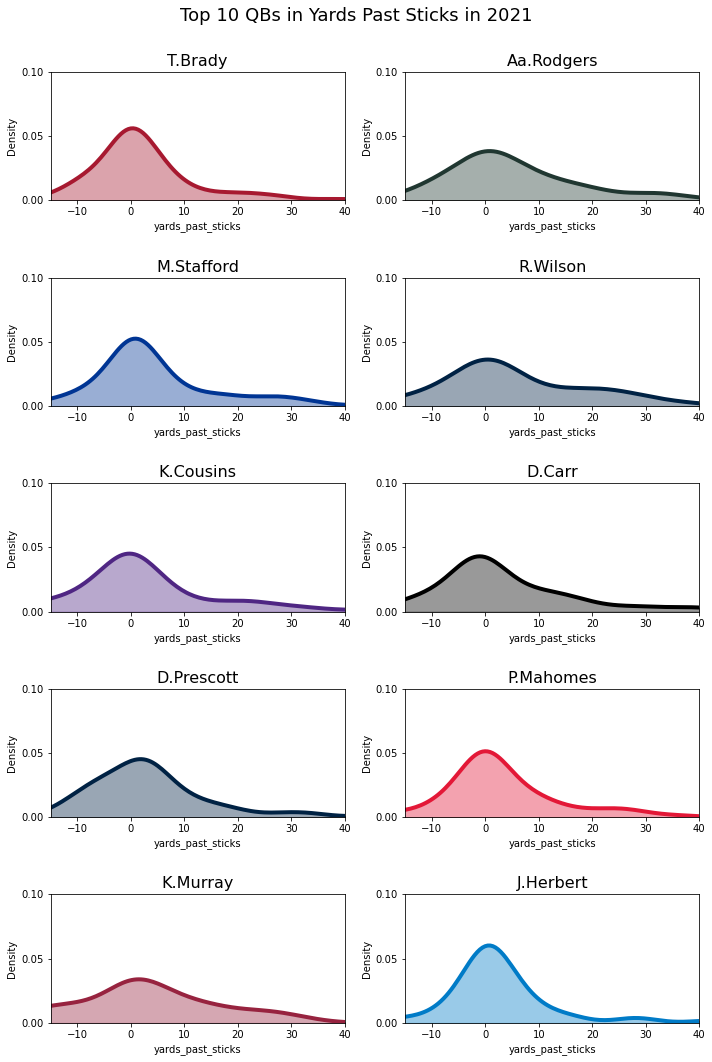

In [8]:
fig, ax = plt.subplots(5,2,figsize = (10,15))

flatten = lambda t: [item for sublist in t for item in sublist]

axes = flatten(ax)

players = [group[-1] for group in df_passes.groupby('passer_player_id')]

for ax, player_df in zip(axes, players):
    sns.kdeplot(player_df['yards_past_sticks'], ax = ax, lw = 4, color = player_df['team_color'].values[0])

    xy = ax.get_lines()[0].get_xydata()
    x, y = xy[:, 0], xy[:, 1]
    ax.fill_between(x,y,color = player_df['team_color'].values[0], alpha = 0.4)

    ax.set_yticks([0, 0.05, 0.1])

    passer_player_name = player_df['passer_player_name'].values[0]
    ax.set_title(f'\n{passer_player_name}', fontsize = 16, fontweight = 450)

    ax.set_ylim(bottom = 0, top = 0.1)
    ax.set_xlim(left = -15, right = 40)

    fig.suptitle("Top 10 QBs in Yards Past Sticks in 2021", fontsize = 18)

    fig.tight_layout()

    fig.subplots_adjust(top = 0.92)

    fig.set_facecolor('white')